## Table of contents
#### Step 1: Importing libraries and data
#### Step 2: Importing time data is not necessary, because I already have "time"-columns in my data.
#### Step 3: Making a subset is not necessary, because all time data is relevant.
#### Step 4: Creating a line chart
#### Step 5: Decomposing the data’s components
#### Step 6: Conducting a Dickey-Fuller test to check for stationarity
#### Step 7 and 8 can be omitted because of stationarity
#### Step 9: Checking the data's autocorrelation

## Step 1: Importing libraries and data

In [1]:
# Importing libraries

import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm 
import os
import warnings 

warnings.filterwarnings("ignore") 

plt.style.use('fivethirtyeight')

In [2]:
# Importing data file by creating a path

path = r'C:\Users\Lenovo\Documents\Eva\Achievement 6'
df = pd.read_csv(os.path.join(path,'Project Achievement 6 Tornado_clean_statename.csv'), index_col = False)

In [3]:
df.head()

,Unnamed: 0,Year,Month,Day,Date,State,Magnitude,Injuries,Fatalities,Starting latitude,Starting longitude,Ending latitude,Ending longitude,Length of track,Width,State name
0,0,1950,1,3,03.01.1950,IL,3.0,3,0,39.10,-89.30,39.12,-89.23,3.6,130,Illinois
1,1,1950,1,3,03.01.1950,MO,3.0,3,0,38.77,-90.22,38.83,-90.03,9.5,150,Missouri
2,2,1950,1,3,03.01.1950,OH,1.0,1,0,40.88,-84.58,NaN,NaN,0.1,10,Ohio
3,3,1950,1,13,13.01.1950,AR,3.0,1,1,34.40,-94.37,NaN,NaN,0.6,17,Arkansas
4,4,1950,1,25,25.01.1950,IL,2.0,0,0,41.17,-87.33,NaN,NaN,0.1,100,Illinois


In [4]:
# Deleting the first unnecessary column

df = df.drop(columns = ['Unnamed: 0'])

In [5]:
# Rechecking the output

df.head()

,Year,Month,Day,Date,State,Magnitude,Injuries,Fatalities,Starting latitude,Starting longitude,Ending latitude,Ending longitude,Length of track,Width,State name
0,1950,1,3,03.01.1950,IL,3.0,3,0,39.10,-89.30,39.12,-89.23,3.6,130,Illinois
1,1950,1,3,03.01.1950,MO,3.0,3,0,38.77,-90.22,38.83,-90.03,9.5,150,Missouri
2,1950,1,3,03.01.1950,OH,1.0,1,0,40.88,-84.58,NaN,NaN,0.1,10,Ohio
3,1950,1,13,13.01.1950,AR,3.0,1,1,34.40,-94.37,NaN,NaN,0.6,17,Arkansas
4,1950,1,25,25.01.1950,IL,2.0,0,0,41.17,-87.33,NaN,NaN,0.1,100,Illinois


In [6]:
df.shape

(67096, 15)

## Step 2: Importing time data is not necessary, because I already have "time"-columns in my data.

## Step 3: Making a subset is not necessary, because all time data is relevant.

## Step 4: Creating a line chart

In [7]:
# Subsetting

df_subset = df[['Date', 'Injuries']]

In [8]:
# Set the "Date" column as the index

from datetime import datetime

df_subset['datetime'] = pd.to_datetime(df_subset['Date']) # Create a datetime column from "Date.""
df_subset = df_subset.set_index('datetime') # Set the datetime as the index of the dataframe.
df_subset.drop(['Date'], axis=1, inplace=True) # Drop the "Date" column.
df_subset.head()

,Injuries
datetime,
1950-03-01,3
1950-03-01,3
1950-03-01,1
1950-01-13,1
1950-01-25,0


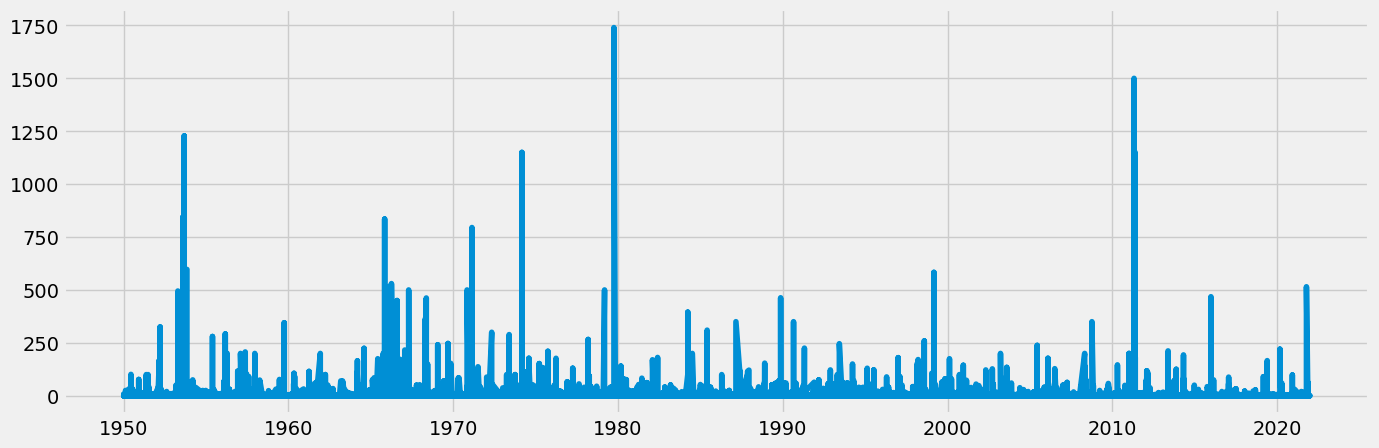

In [9]:
# Plotting the data

plt.figure(figsize=(15,5), dpi=100)
plt.plot(df_subset)

## Step 5: Decomposing the data’s components

In [10]:
# Decomposing the time series using an additive model

decomposition = sm.tsa.seasonal_decompose(df_subset, model='additive', period = 1)

In [11]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

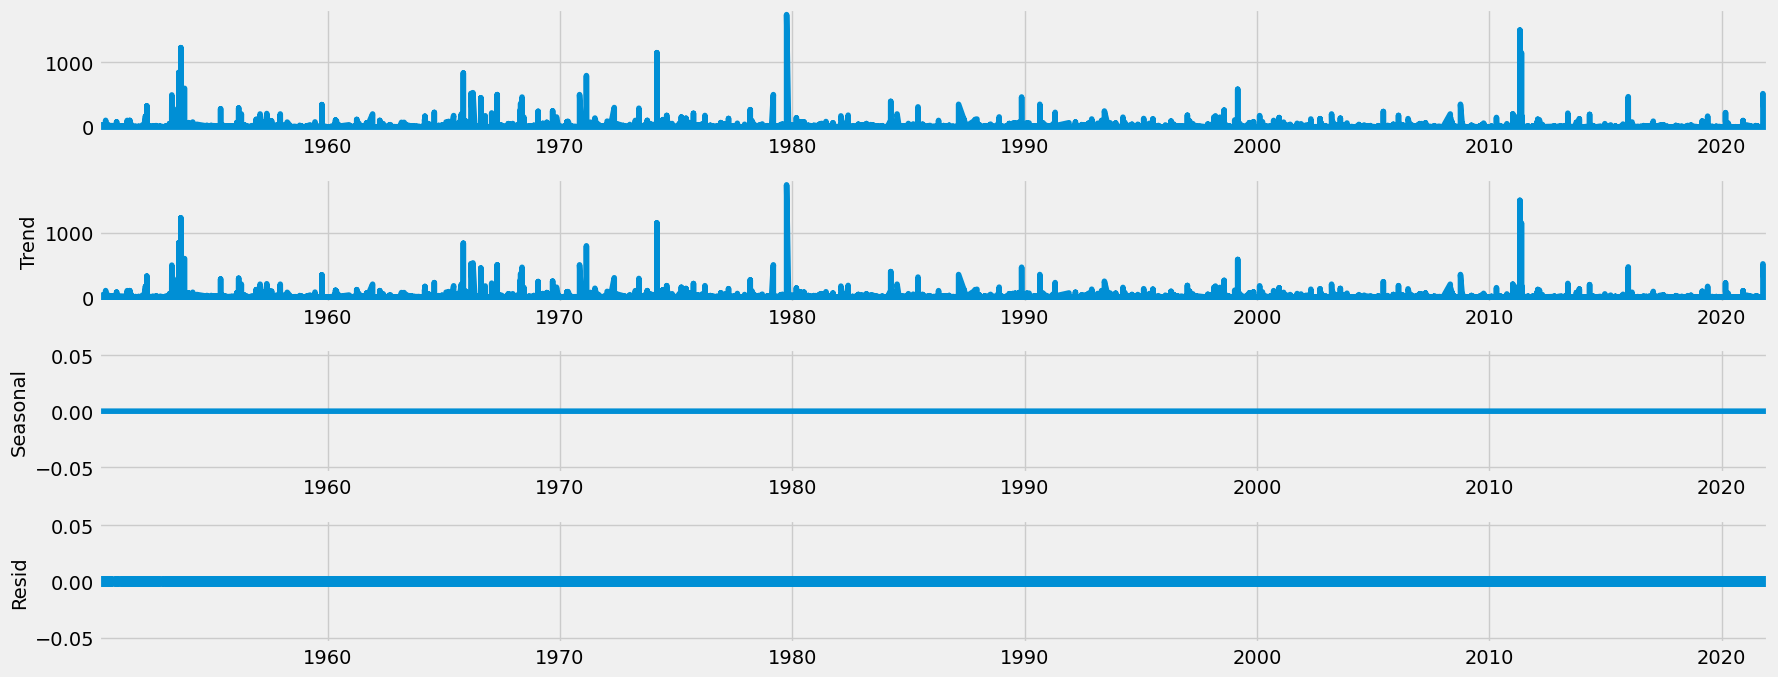

In [12]:
# Plotting the separate components

decomposition.plot()
plt.show()

The level (the topmost line) and trend appear the same, since there is no noise or residual to the data. We can see that there have been many injuries caused by tornados in the mid 1950s, in the late 1960s and early 1970s, around 1980 and around 2012. The curve of "seasonal" is flat, so the data has no seasonality. 

## Step 6: Conducting a Dickey-Fuller test to check for stationarity

In [13]:
from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(df_subset['Injuries'])

Dickey-Fuller Stationarity test:
Test Statistic                   -30.316973
p-value                            0.000000
Number of Lags Used               50.000000
Number of Observations Used    67045.000000
Critical Value (1%)               -3.430448
Critical Value (5%)               -2.861583
Critical Value (10%)              -2.566793
dtype: float64


The null hypothesis is that there is a unit root which corresponds to non-stationary data. Correspondingly, the alternative hypothesis is that there is no unit root and the data is stationary. Since the test statistic is smaller than the critical value (5%), we can reject the null hypothesis and state that the data is stationary. Therefore, we don't have to do any stationarizing.

## Step 7 and 8 can be omitted because of stationarity

## Step 9: Checking the data's autocorrelation

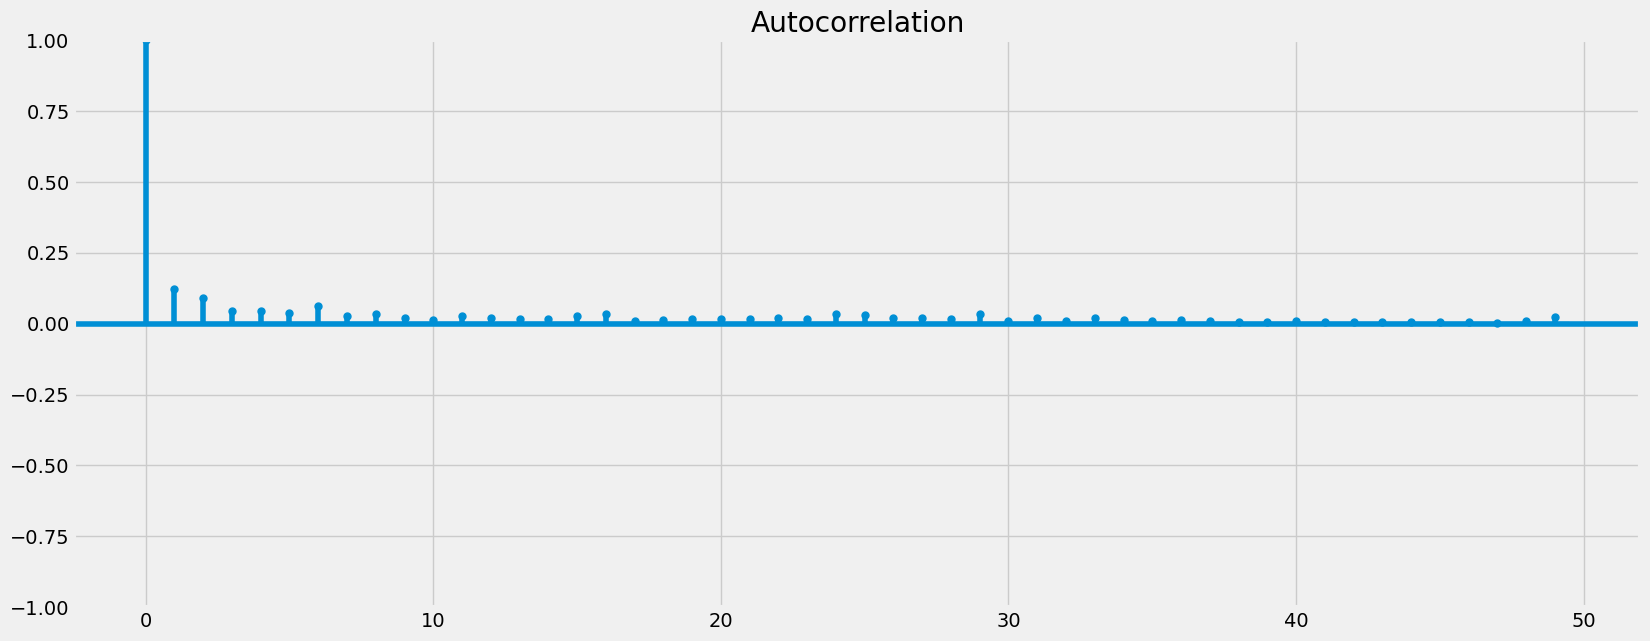

In [14]:
# Checking out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Importing the autocorrelation and partial correlation plots

plot_acf(df_subset)
plt.show()

There seems to be no significant autocorrelation.